In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = l1_regularizer,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.9444444444444444, Loss: 0.3355265370121709
Checkpoint 200, Accuracy: 0.9691358024691358, Loss: 0.2274849503128617
Checkpoint 300, Accuracy: 0.9691358024691358, Loss: 0.2249177473562735
Checkpoint 400, Accuracy: 0.9691358024691358, Loss: 0.21158804716887297
Checkpoint 500, Accuracy: 0.9629629629629629, Loss: 0.20995846501103155


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.9412563  0.0318116  0.02693219]
[1. 0. 0.] <-> [0.90846455 0.05346626 0.03806929]
[0. 0. 1.] <-> [0.1707087  0.01765557 0.8116357 ]
[1. 0. 0.] <-> [0.7972291  0.1439356  0.05883534]
[0. 0. 1.] <-> [0.68990695 0.03067702 0.27941602]
[1. 0. 0.] <-> [0.93773943 0.05045713 0.01180335]
[1. 0. 0.] <-> [0.9265918  0.05814181 0.01526639]
[0. 0. 1.] <-> [0.19824453 0.01769447 0.78406096]
[1. 0. 0.] <-> [0.94469506 0.03167835 0.02362655]
[0. 0. 1.] <-> [0.14511982 0.01835659 0.83652353]
[1. 0. 0.] <-> [0.91887385 0.03339922 0.04772696]
[1. 0. 0.] <-> [0.9035939  0.04337914 0.05302697]
[1. 0. 0.] <-> [0.93171084 0.03619292 0.03209632]
[1. 0. 0.] <-> [0.943231   0.03096528 0.02580372]
[1. 0. 0.] <-> [0.94974786 0.03664086 0.01361124]
[0. 1. 0.] <-> [0.17929599 0.814124   0.00658007]
[1. 0. 0.] <-> [0.86558807 0.10719251 0.02721942]
[1. 0. 0.] <-> [0.8093524  0.04321585 0.14743178]
[1. 0. 0.] <-> [0.75898296 0.05909637 0.18192063]
[1. 0. 0.] <-> [0.8773301  0.0496722  0.07299759]


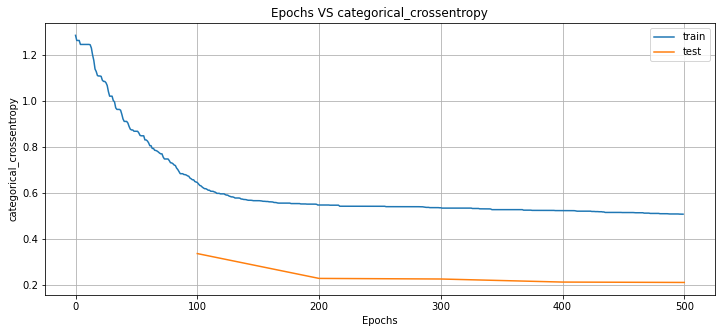

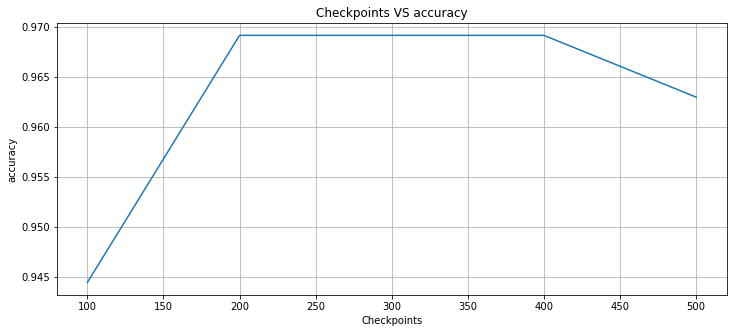

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9444444444444444, 'mean_square_error': 0.1678861439192662, 'categorical_crossentropy': 0.3355265370121709, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 8, 'tn_hit': 22, 'fn_hit': 1}, 1: {'tp_hit': 14, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 2}, 2: {'tp_hit': 8, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 6}}, 'checkpoint': 100} 


{'accuracy': 0.9691358024691358, 'mean_square_error': 0.10315233317828942, 'categorical_crossentropy': 0.2274849503128617, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 4, 'tn_hit': 26, 'fn_hit': 1}, 1: {'tp_hit': 15, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 1}, 2: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 3}}, 'checkpoint': 200} 


{'accuracy': 0.9691358024691358, 'mean_square_error': 0.10397353108142668, 'categorical_crossentropy': 0.2249177473562735, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 4, 'tn_hit': 26, 'fn_hit': 1}, 1: {'tp_hit': 16, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 0}, 2: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 94, 'fn_

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[-0.15860957  2.0298939  -0.11098392 -0.8382017  -1.0753931 ]
 bias: 1.6266955137252808

Neuron 1: weights:
[-1.1805665   1.7540191   1.87055    -0.00530159  0.12849645]
 bias: -1.2261865139007568

Neuron 2: weights:
[-0.25541398  0.97428596  0.00122762 -0.01042337 -0.00788792]
 bias: 0.18610329926013947

Neuron 3: weights:
[-0.09129722  0.98289466  0.04614449 -0.14663143 -0.14535768]
 bias: 0.05307688191533089

$
Layer 2
Neuron 0: weights:
[ 3.         -2.4318964  -0.07518093  0.02067009]
 bias: -0.12704604864120483

Neuron 1: weights:
[0.0666739 3.        1.4248221 1.2742759]
 bias: -2.720743417739868

Neuron 2: weights:
[-2.8744912   0.10048493 -0.41058278 -1.2667698 ]
 bias: 1.806816577911377

$

